In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import operator
from sklearn.ensemble import RandomForestClassifier

#example from https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
#how to explain https://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn

In [2]:
instagram = pd.read_csv(os.path.join('train.csv'))


In [3]:
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

In [4]:
X = instagram.drop("fake", axis=1)
y = instagram["fake"]

In [5]:
# # Create decision tree classifer object
# clf = DecisionTreeClassifier(random_state=0)

# # Train model
# model = clf.fit(X, y)

In [6]:
clf = DecisionTreeClassifier(random_state=0)

# # Train model
model = clf.fit(X, y)

In [7]:
# Create DOT data


# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=iris.feature_names,  
#                                 class_names=iris.target_names)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

In [8]:
feature_names = list(instagram.columns.values)
#print(feature_names)
feature_names.pop()
print(feature_names)

['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows']


In [9]:
# class_names = list(y)
# print(class_names)
#This is not doing what I want.  Want to have Fake, not fake or true false

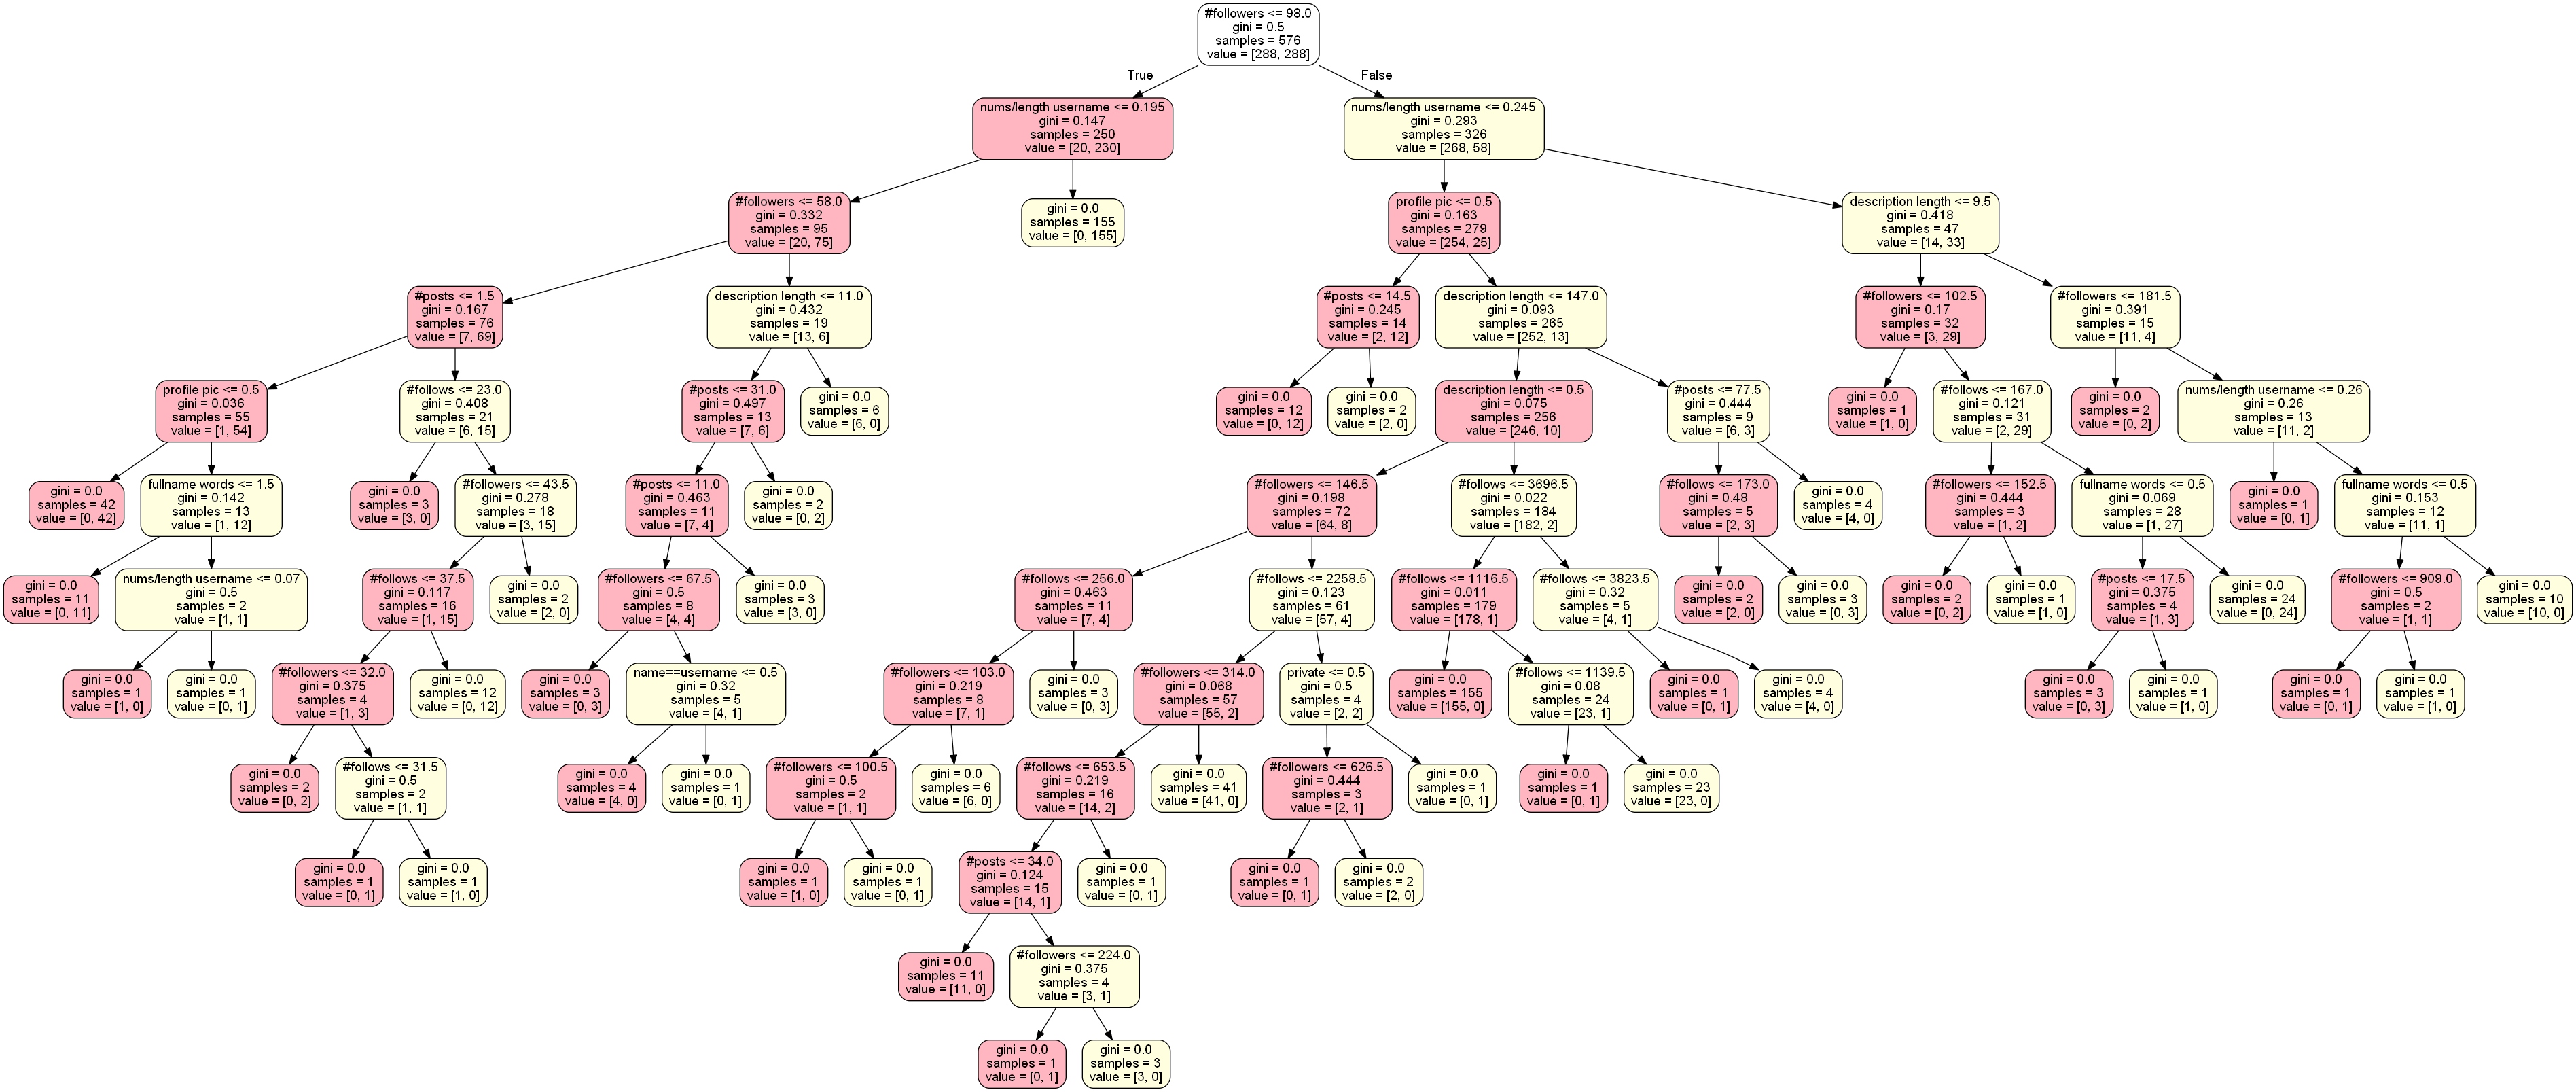

In [31]:
import collections
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=feature_names,
                                filled=True,
                                rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('lightpink', 'lightyellow')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Show graph
Image(graph.create_png())

In [14]:
#graph.write_png("decision_tree_colored.png")

True